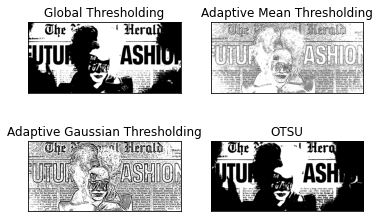

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img =cv2.imread('foto.jpg',0)
plt.imshow(img)

ret,th1=cv2.threshold(img,50,255,cv2.THRESH_BINARY)

th2=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,5,2)

th3=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,23,2)
ret4,th4=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

titles=['Global Thresholding','Adaptive Mean Thresholding','Adaptive Gaussian Thresholding','OTSU']

images=[th1,th2,th3,th4]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

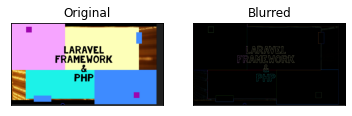

In [92]:
img =cv2.imread('foto2.png')
kernel=np.ones((5,5),np.float32)/25
# dst=cv2.blur(img,(5,5))

laplacian=np.array((
[0,1,0],
[1,-4,1],
[0,1,0]),dtype="int")

dst=cv2.filter2D(img,-1,laplacian)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Blurred')
plt.xticks([]),plt.yticks([])
plt.show()

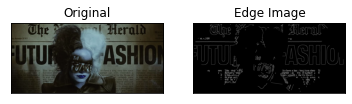

In [67]:
img =cv2.imread('foto.jpg')
kernel =np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

img_sharpened=cv2.filter2D(img,-1,kernel)

cv2.imwrite("sharpened.jpg",img_sharpened)

edges=cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title("Original")
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title("Processed")
plt.xticks([]),plt.yticks([])


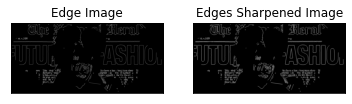

In [71]:
edges=cv2.Canny(img,100,200)
edges_sharpened=cv2.Canny(edges,100,200)

plt.subplot(121),plt.imshow(edges,cmap='gray'),plt.title("Edge Image")
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(edges_sharpened,cmap='gray'),plt.title("Edges Sharpened Image")
plt.xticks([]),plt.yticks([])
plt.show()

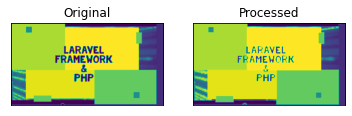

In [4]:
img=cv2.imread('foto2.png',0)
n=6
kernel=np.ones((n,n),np.uint8)

erosion=cv2.erode(img,kernel,iterations=1)
dilation=cv2.dilate(img,kernel,iterations=1)

plt.subplot(121),plt.imshow(img),plt.title("Original")
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title("Processed")
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(dilation),plt.title("Processed")
plt.xticks([]),plt.yticks([])
plt.show()

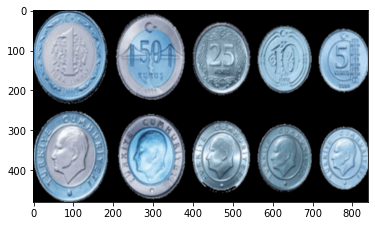

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

frame=cv2.imread('foto6.png')
frame=cv2.resize(frame,(840,480))
plt.imshow(frame)

gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)[1]

kernel=np.ones((7,7),np.uint8)
closing=cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,
                         kernel,iterations=4)

closing_img=closing.copy()
contours,hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    area=cv2.contourArea(cnt)
    
    if area<1000:
        continue
    #print(area)
    
    ellipse=cv2.fitEllipse(cnt)
    cv2.ellipse(frame,ellipse,(255,0,0),6)
 
# plt.imshow(frame)
cv2.imshow("Otsu Thresh Holding", thresh)
cv2.imshow("Morphological Closing", closing)
cv2.imshow("Contours", frame)

if cv2.waitKey(0)&0xff==27:
    cv2.destroyAllWindows()

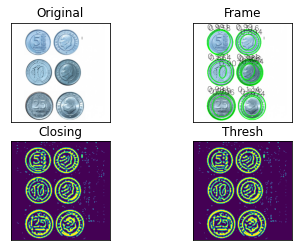

In [2]:
frame=cv2.imread('foto7.jpg')
frame=cv2.resize(frame,(400,400))
original=frame.copy()

plt.imshow(frame)

gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

gray_blur= cv2.GaussianBlur(gray,(15,15),0)


thresh=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,1)


kernel=np.ones((1,1),np.uint8)
closing=cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,
                         kernel,iterations=4)

closing_img=closing.copy()
contours,hierarchy=cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

font=cv2.FONT_HERSHEY_SIMPLEX

segment_prop={}
segments=[]
for cnt in contours:
    area=cv2.contourArea(cnt)
    
    if area<1000:
        continue
    #print(area)
    
    ellipse=cv2.fitEllipse(cnt)
    
    segment_prop['area']=area
    segment_prop['perimeter']=perimeter=cv2.arcLength(cnt,True)
    
    x,y,w,h=cv2.boundingRect(cnt)
    segment_prop['aspect_ratio']=aspect_ratio=float(w)/h
    
    rect_area=w*h
    segment_prop['extent']=extent=float(area)/rect_area
    
    hull=cv2.convexHull(cnt)
    hull_area=cv2.contourArea(hull)
    segment_prop['solidity']=solidity=float(area)/hull_area
    
    segments.append(segment_prop)
    
    text=round(segment_prop['solidity'],3)
    
    cv2.putText(frame,str(text),(x,y),font,1,(0,0,0),1,cv2.LINE_AA)
    cv2.ellipse(frame,ellipse,(0,255,0),2)
    
plt.subplot(2,2,1),plt.imshow(original),plt.title("Original"),plt.xticks([]),plt.yticks([]) 
plt.subplot(2,2,2),plt.imshow(frame),plt.title("Frame"),plt.xticks([]),plt.yticks([])
plt.subplot(2,2,3),plt.imshow(closing),plt.title("Closing"),plt.xticks([]),plt.yticks([])
plt.subplot(2,2,4),plt.imshow(thresh),plt.title("Thresh"),plt.xticks([]),plt.yticks([])

plt.show()


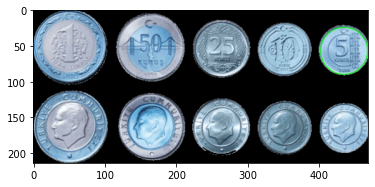

In [23]:
#Blob Detection
params=cv2.SimpleBlobDetector_Params()

params.filterByArea=True
params.minArea=100

#filter by circularity
params.filterByCircularity=False
params.minCircularity=0.1

detector=cv2.SimpleBlobDetector_create(params)

im=cv2.imread('foto6.png')

keypoints=detector.detect(im)

im_with_keypoints=cv2.drawKeypoints(im,keypoints,np.array([]),(0,255,0),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(im_with_keypoints)
# cv2.imshow("blobs",im_with_keypoints)

if cv2.waitKey(0)&0xff==27:
    cv2.destroyAllWindows()

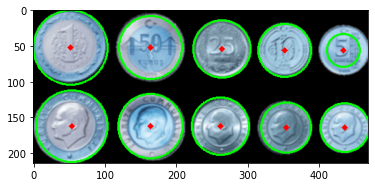

In [43]:
img=cv2.imread("foto6.png")

#blurring with the gaussian
img=cv2.GaussianBlur(img,(3,3),0)
#Turning GrayScale
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

dp=1
minDist=75#minimum  distance between the centers of the detected circles/Tespit edilen cemberlerin merkezleri arasındaki minimum mesafe
circles=cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,dp,minDist,param1=50,param2=30,minRadius=10,maxRadius=70)#min-max circle radius

circles=np.uint16(np.around(circles))
for i in circles[0,:]:
    #draw the outer circle/Dairenin Etrafını çizer
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    #draw the center of circle/Dairenin Merkezini çizer
    cv2.circle(img,(i[0],i[1]),2,(255,0,0),3)
    
plt.imshow(img)    

# cv2.imshow('detected circles',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

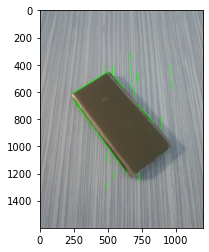

In [19]:
#finding lines
img=cv2.imread('foto3.jpg')

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

edges=cv2.Canny(gray,50,150)

plt.imshow(edges)

rho=0.02
teta=np.pi/180
thres=3
min_line_length=50
max_line_gap=10
lines=cv2.HoughLinesP(image=edges,rho=rho,theta=teta,threshold=thres,lines=np.array([]),
                     minLineLength=min_line_length,maxLineGap=max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),4)

plt.imshow(img)

[INFO] 24 unique segments found
labels shape:  (480, 640)


C:\Users\Muhammet\AppData\Local\Temp/ipykernel_12448/2307125546.py:19: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  localMax=peak_local_max(D,indices=False,min_distance=20,
D:\anaconda3\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


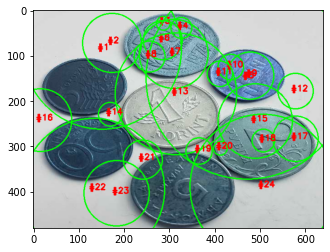

In [45]:
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from scipy import ndimage
from skimage.filters import threshold_otsu

img=cv2.imread('foto8.jpg')
img=cv2.resize(img,(640,480))

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray=cv2.GaussianBlur(gray,(25,25),0)

thresh=threshold_otsu(gray)
thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)[1]

plt.imshow(thresh)

D=ndimage.distance_transform_edt(thresh)
localMax=peak_local_max(D,indices=False,min_distance=20,
                       labels=thresh)

markers=ndimage.label(localMax,structure=np.ones((3,3)))[0]
labels=watershed(-D,markers,mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels))-1))

print("labels shape: ",labels.shape)

for label in np.unique(labels):
    if label==0:
        continue
        
    mask=np.zeros(gray.shape,dtype="uint8")
    mask[labels==label]=255
    
    cnts=cv2.findContours(mask.copy(),cv2.RETR_EXTERNAL,
                         cv2.CHAIN_APPROX_SIMPLE)[-2]
    
    c=max(cnts,key=cv2.contourArea)
    
    ((x,y),r)=cv2.minEnclosingCircle(c)
    cv2.circle(img,(int(x),int(y)),int(r),(0,255,0),2)
    cv2.putText(img,"#{}".format(label),(int(x)-10,int(y)),
               cv2.FONT_HERSHEY_SIMPLEX,0.6,(255,0,0),2)
plt.imshow(img)